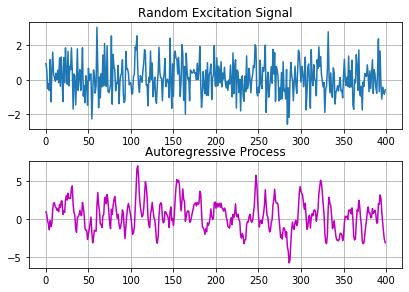

In [2]:
#  constant AR process
import numpy as np
import matplotlib.pyplot as plt
# Length of time series
#
N=400
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process
#
a = np.array([1.2, -0.4])
S = ex.copy();
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, a) + ex[n]
    

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,4))
plt.tight_layout()

ax[0].plot(range(N), ex)
ax[0].grid(True)
ax[0].set_title("Random Excitation Signal")
ax[1].plot(range(N), S, color='m')
ax[1].grid(True)
ax[1].set_title("Autoregressive Process")
plt.show()

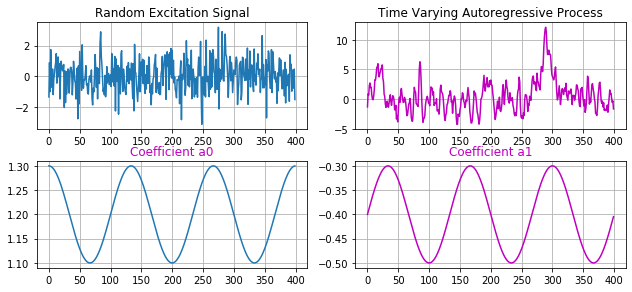

In [2]:
# time-varying AR process

import numpy as np
import matplotlib.pyplot as plt
# Length of time series
#
N=400
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process with coefficients slowly changing in time
#
a0 = np.array([1.2, -0.4])
A = np.zeros((N,2))
omega, alpha = N/2, 0.1
for n in range(N):
    A[n,0] = a0[0] + alpha * np.cos(6*np.pi*n/N)
    A[n,1] = a0[1] + alpha * np.sin(6*np.pi*n/N)
S = ex.copy();
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, A[n,:]) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[1,0].plot(range(N), A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("Coefficient a0", color='m')
ax[1,1].plot(range(N), A[:,1], color='m')
ax[1,1].grid(True)
ax[1,1].set_title("Coefficient a1", color='m')
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
ax[0,1].plot(range(N), S, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")
plt.show()

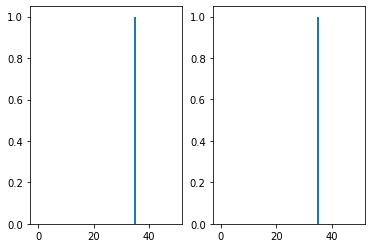

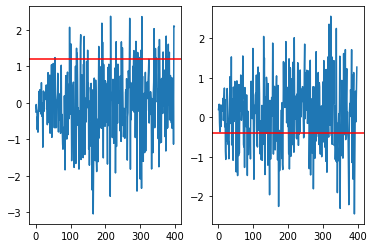

In [11]:
# 尝试1

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = 400
L = 50
w1_series = np.ones(L)
w2_series = np.ones(L)
w1_normalise_array, w2_normalise_array = [], []
theta_series1 = np.ones(L)
theta_series2 = np.ones(L)

theta1_conv, theta2_conv = [], []

beta = np.random.randn(L)
X = np.random.randn(L)




def distribution(mu=0, sigma=1):
    distribution = stats.norm(mu, sigma)
    return distribution


def normalise(weight, weight_array):
    return weight * 1.0 / sum(weight_array)


#
for t in range(1, N):
    w1_normalise_array.clear()
    w2_normalise_array.clear()
    for l in range(L):
        theta_series1[l] = np.random.normal(theta_series1[l]*X[l], 1, 1)
        theta_series2[l] = np.random.normal(theta_series2[l]*X[l], 1, 1)
        observation_model1 = distribution(mu=beta[l] * theta_series1[l], sigma=np.var(X))
        observation_model2 = distribution(mu=beta[l] * theta_series2[l], sigma=np.var(X))
        observation_p1 = observation_model1.pdf(X[l])
        observation_p2 = observation_model2.pdf(X[l])
        w1_series[l] = w1_series[l] * observation_p1
        w2_series[l] = w2_series[l] * observation_p2

    for l in range(L):
        w1_normalise_array.append(normalise(w1_series[l], w1_series))
        w2_normalise_array.append(normalise(w2_series[l], w2_series))

    theta_temp1, theta_temp2 = 0, 0
    for l in range(L):
        theta_temp1 += w1_normalise_array[l] * theta_series1[l]
        theta_temp2 += w2_normalise_array[l] * theta_series2[l]
    theta1_conv.append(theta_temp1)
    theta2_conv.append(theta_temp2)

    
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(range(len(w1_normalise_array)), height=w1_normalise_array)
ax[1].bar(range(len(w2_normalise_array)), height=w2_normalise_array)
plt.show()    
    

fig2, ax2 = plt.subplots(nrows=1, ncols=2)
ax2[0].plot(theta1_conv)
ax2[0].axhline(y=a0[0], color='r')
ax2[1].plot(theta2_conv)
ax2[1].axhline(y=a0[1], color='r')
plt.show()


        
        
        
    
    


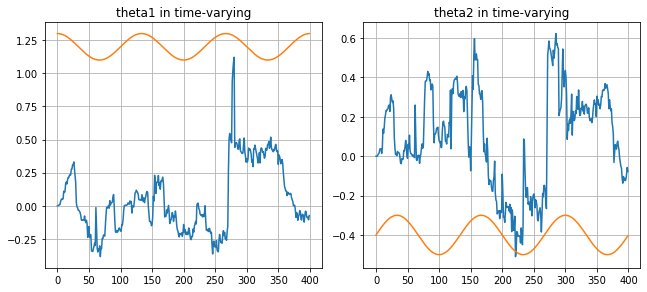

In [4]:
# 尝试2
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = 400  # 时间序列长度
L = 200  # 粒子数量
ex = np.random.randn(N)

R = 1*np.std(ex[0:10])  # 测量噪声
Q = 0.001*np.eye(2)  # 过程噪声

theta = np.zeros((L, 2))
x = np.ones((2,))
y = S.copy()
SS2 = ex.copy()


result_1, result_2 = np.zeros(N), np.zeros(N)

w = np.abs(np.random.randn(L))


for t in range(2, N):
  x[0] = SS2[t-1]
  x[1] = SS2[t-2]
  result = np.array([result_1[t-1], result_2[t-1]])
  SS2[t] = np.dot(x, result) + ex[t]
  for l in range(L):
    theta[l, :] = np.random.multivariate_normal(theta[l, :], Q)
    w[l] = w[l] * stats.norm(loc=theta[l, :].T @ x, scale=R).pdf(y[t])
  w_sum = w.sum()
  for l in range(L):
    w[l] = w[l] / w_sum
    result_1[t] += w[l] * theta[l,0]
    result_2[t] += w[l] * theta[l,1]
  



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[0].plot(result_1)
ax[0].plot(range(N), A[:,0])
ax[0].grid(True)
ax[0].set_title("theta1 in time-varying")
ax[1].plot(result_2)
ax[1].grid(True)
ax[1].plot(range(N), A[:,1])
ax[1].set_title("theta2 in time-varying")

plt.show()

Text(0.5, 1.0, 'Latest Particles')

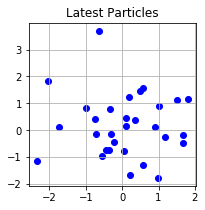

In [29]:

##Partile Filter Estimates of second order AR parameters
#100个粒子
Ns = 30
#Initial particles
parts = np.random.randn(Ns,2)
fig,ax = plt.subplots(figsize=(3,3))
ax.scatter(parts[:,0],parts[:,1],color='b')
ax.grid(True)
ax.set_title("Latest Particles")

Text(0.5, 1.0, 'Effective Particles')

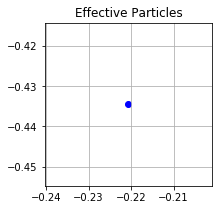

In [30]:
fig,ax = plt.subplots(figsize=(3,3))
ax.scatter(parts[26,0],parts[26,1],color='b')
ax.grid(True)
ax.set_title("Effective Particles")

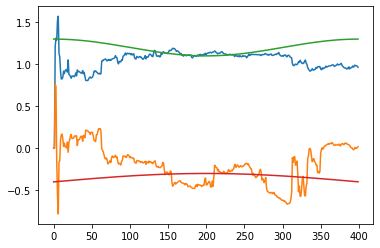

In [32]:
##尝试3 SIS
#高斯噪声似然
#Needs estimate true value and noise variance
def particle_likelihood(y0,yh,sig):
    lhood = (1/(2*np.pi*sig))*np.exp(-0.5*(y0-yh)**2)
    return lhood

#Process noise covariance is beta*I
beta = 0.01

#Observation noise variance
sig = np.std(ex)

#Initial input vector and particle weights
x = np.zeros((2,1))
pweights = np.ones((Ns,1))/Ns

theta_track = np.zeros((N, 2))

#Go over the data
for n in range(2,N):
    x[0] = S[n-1]
    x[1] = S[n-2]
    
    #Sample particles from the prior
    #in the simplest case here, random perturbation
    for p in range(Ns):
        parts[p,:] = parts[p,:] + beta*np.random.randn(1,2)
        
    #Predictions and likelihoods
    sh = np.zeros((Ns,1))
    lhoods = sh.copy()
    for particle in range(Ns):
        th = parts[particle,:].T.copy()
        sh[particle] = x.T@th
        lhoods[particle] = particle_likelihood(S[n],sh[particle],sig)
    #multiply prior weights by likelihoods and normalize
    pweights = pweights * lhoods
    pweights = pweights / np.sum(pweights)
    for i in range(Ns):
        theta_track[n] += parts[i] * pweights[i]
    #Observe how the weights change as you update
#     fig,ax = plt.subplots(figsize=(4,4))
#     ax.bar(np.arange(len(pweights)),pweights[:,0])

plt.plot(theta_track)
plt.plot(range(N), A[:,0])
plt.plot(range(N), A[:,1])
plt.show()